<a href="https://colab.research.google.com/github/ThatiFlowers/Amigo-Secreto-Challenge/blob/main/Telecom_X_Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Quais são os clientes com maior risco de evasão?
 # Quais variáveis mais influenciam esse comportamento?
 # Que tipo de perfil a empresa precisa manter mais próximo?

In [99]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [100]:
# Ver as colunas
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [102]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [103]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [104]:
df = df.drop(columns=['customerID'])

In [105]:
#Encoding
colunas_categoricas= df. select_dtypes(include="object").columns
print(colunas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [106]:
df = pd.get_dummies(df, columns= colunas_categoricas, drop_first = True)

In [107]:
df

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,False,False,False,True,False,True,False,False,False,True


In [108]:
df['Churn_Yes'].value_counts(normalize = True)

,proportion
Churn_Yes,
False,0.73463
True,0.26537


In [153]:
print(df.dtypes)

customer.SeniorCitizen                             int64
customer.tenure                                    int64
Total.Day                                        float64
account.Charges.Monthly                          float64
account.Charges.Total                            float64
Churn_Yes                                           bool
customer.gender_Male                                bool
customer.Partner_Yes                                bool
customer.Dependents_Yes                             bool
phone.PhoneService_Yes                              bool
phone.MultipleLines_No phone service                bool
phone.MultipleLines_Yes                             bool
internet.InternetService_Fiber optic                bool
internet.InternetService_No                         bool
internet.OnlineSecurity_No internet service         bool
internet.OnlineSecurity_Yes                         bool
internet.OnlineBackup_No internet service           bool
internet.OnlineBackup_Yes      

In [128]:
import numpy as np
# print(np.isinf(x).sum())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [129]:
# Balanceamento de proporções, pois está abaixo de 20 para true

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# 1. Separar X e y
x= df.drop('Churn_Yes', axis=1)
y= df['Churn_Yes']

imputer = SimpleImputer (strategy= 'mean')
X_imputed = imputer.fit_transform(x)

smote= SMOTE(random_state=42)
X_res, y_res= smote.fit_resample (X_imputed,y)

In [130]:
#Padronização dos dados

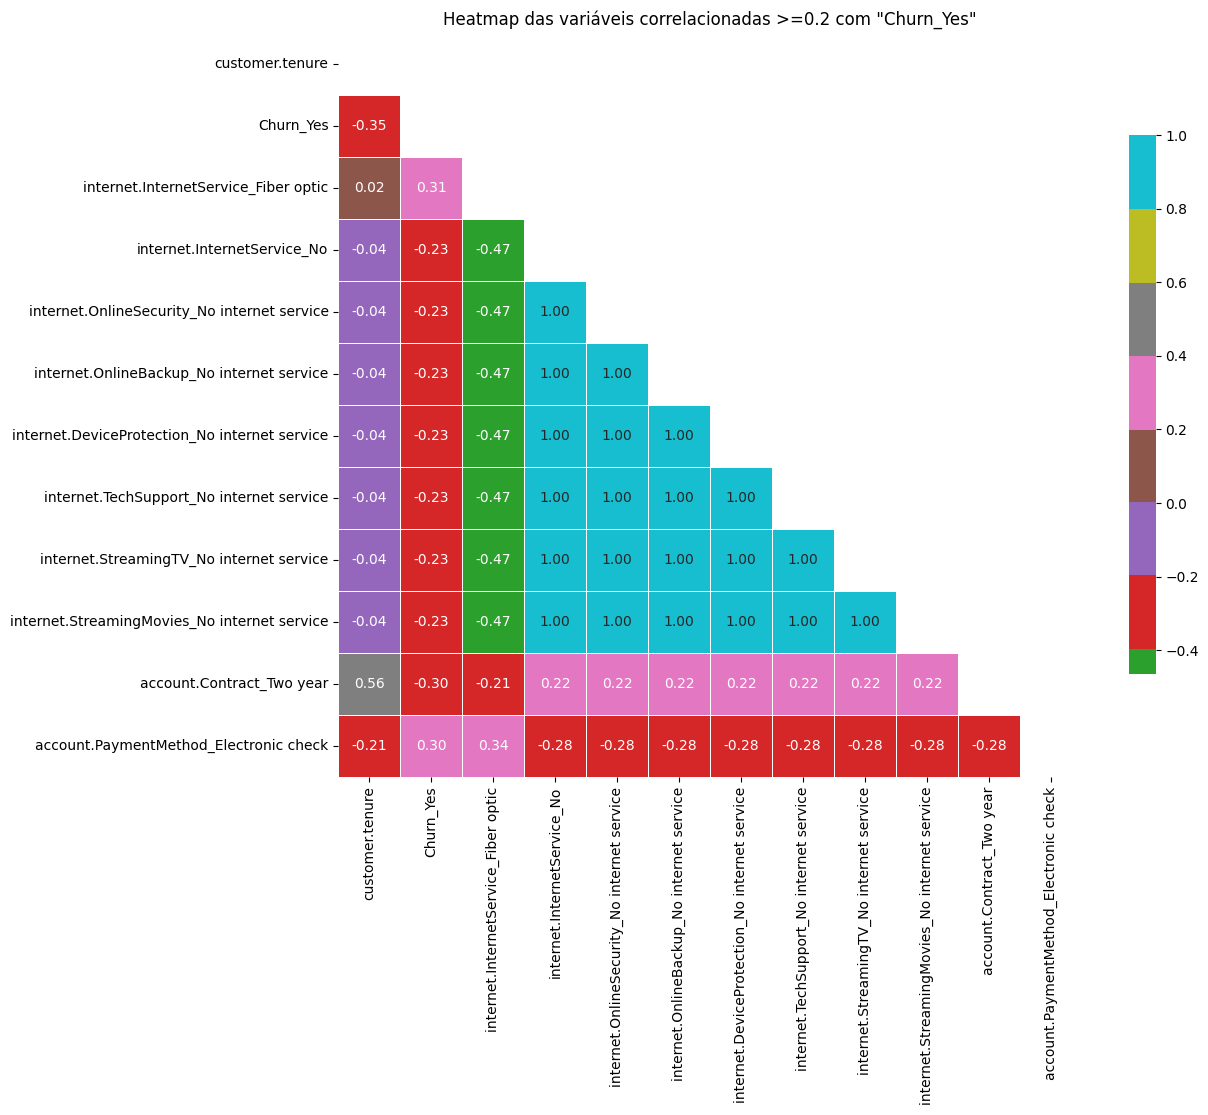

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

target_var ='Churn_Yes'
limiar = 0.2

variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

if target_var not in variaveis_relevantes:
  variaveis_relevantes.append(target_var)

corr_filtrada = corr.loc[variaveis_relevantes,variaveis_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot= True,
    fmt=".2f",
    cmap='tab10',
    center=0,
    square= True,
    linewidths=0.5,
    cbar_kws={"shrink":0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis correlacionadas >={limiar} com "{target_var}"')
plt.show()

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculate Variance Inflation Factor (VIF) in the next cell

In [122]:
X= df.drop(columns=['Churn_Yes'])

In [143]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_const_imputed_df.columns

# Check for non-numeric columns before calculating VIF
non_numeric_cols = X_const_imputed_df.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    print(f"Columns with non-numeric data causing the error: {list(non_numeric_cols)}")
    # Depending on the nature of the non-numeric data, you might need to:
    # 1. Convert them to numeric types if possible (e.g., boolean to int).
    # 2. Exclude them from VIF calculation if they are truly non-numeric.
    # For now, I will proceed with the calculation, but be aware of these columns.

vif_data["VIF"] = [variance_inflation_factor(X_const_imputed_df.values, i) for i in range(X_const_imputed_df.shape[1])]

display(vif_data.sort_values(by='VIF', ascending= False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
13,internet.OnlineSecurity_No internet service,inf
9,phone.MultipleLines_No phone service,inf
8,phone.PhoneService_Yes,inf
12,internet.InternetService_No,inf
21,internet.StreamingTV_No internet service,inf
17,internet.DeviceProtection_No internet service,inf
15,internet.OnlineBackup_No internet service,inf
19,internet.TechSupport_No internet service,inf
23,internet.StreamingMovies_No internet service,inf
4,account.Charges.Monthly,968.770338


In [152]:
X_encoded_array = ct.fit_transform(X)

# 5. Recuperar nombres de columnas
encoded_cols = ct.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
non_encoded_cols = X.select_dtypes(exclude='object').columns.tolist()
final_cols = list(encoded_cols) + non_encoded_cols

# 6. Convertir a DataFrame
X_encoded = pd.DataFrame(X_encoded_array, columns=final_cols)

# 7. Verificar forma final
print(X_encoded.shape)
X_encoded.head()

NameError: name 'ct' is not defined

In [120]:
#Separação dos dados

In [119]:
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 42)

In [117]:
from sklearn.preprocessing import MinMaxScaler
normalizacion=MinMaxScaler()
X_train_norma=normalizacion.fit_transform(X_train)
#print(X_norma_train_bal.shape)
X_test_norma=normalizacion.fit_transform(X_test)# normalização

In [114]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_norma, y_train)
#X_test_bal, y_test_bal = smote.fit_resample(X_test_norma, y_test)
print(' despues de balancear',X_train_bal.shape)
print('antes de balance',X_train.shape)

 despues de balancear (7760, 31)
antes de balance (5282, 31)


In [116]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [135]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Impute missing values before normalization
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Use the same imputer fitted on training data

# Normalize the data
normalizacion = MinMaxScaler()
X_train_norma = normalizacion.fit_transform(X_train_imputed)
X_test_norma = normalizacion.transform(X_test_imputed) # Use the same scaler fitted on training data

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_norma, y_train)

print('Shape after balancing (training data):', X_train_bal.shape)
print('Shape before balancing (training data):', X_train.shape)
print('Shape of testing data:', X_test_norma.shape)

Shape after balancing (training data): (7760, 31)
Shape before balancing (training data): (5282, 31)
Shape of testing data: (1761, 31)


In [112]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_const_imputed = imputer.fit_transform(X_const)

# Convert the imputed array back to a DataFrame for VIF calculation
X_const_imputed_df = pd.DataFrame(X_const_imputed, columns=X_const.columns)


vif_data = pd.DataFrame()
vif_data["feature"] = X_const_imputed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_const_imputed_df.values, i) for i in range(X_const_imputed_df.shape[1])]

display(vif_data.sort_values(by='VIF', ascending= False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
13,internet.InternetService_No,inf
14,internet.OnlineSecurity_No internet service,inf
10,phone.MultipleLines_No phone service,inf
9,phone.PhoneService_Yes,inf
20,internet.TechSupport_No internet service,inf
22,internet.StreamingTV_No internet service,inf
18,internet.DeviceProtection_No internet service,inf
16,internet.OnlineBackup_No internet service,inf
24,internet.StreamingMovies_No internet service,inf
4,account.Charges.Monthly,968.821021


Análise de Correlação (Matriz de Correlação)
Foi analisada a matriz de correlação para identificar relações entre variáveis numéricas. A continuação, destacam-se as abordagens:

📌 Correlação com churn: Se extrai os coeficientes de correlação linear entre as variáveis numéricas e a variável objetivo (churn). Os valores foram muito baixos, o que indica que não existem relações lineares fortes. A posse variável (tempo como cliente) mostrou um nível de correlação negativa com o cancelamento, o que sugere que os clientes mais antigos tenham que cancelar menos.

📊 Matriz de Correlação Geral: Foi visualizado um mapa de calor com todas as correlações entre variáveis. Este gráfico permitiu identificar relações fortes entre algumas variáveis:

posse e encargos_total: 0,83
cobranças_mensais e cobranças_total: 0,65
companheiro e dependentes: 0,46
🔍 Embora não haja correlações altas com rotatividade, essas relações entre variáveis podem ser úteis para entender o comportamento dos clientes e evitar colinealidade em alguns modelos.